In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
API_KEY = 'YZFIGXM1LVE5BOOC'
BASE_URL = 'https://www.alphavantage.co/query'


In [2]:
def fetch_data(symbol, function, **params):
    params['function'] = function
    params['symbol'] = symbol
    params['apikey'] = API_KEY
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    return data

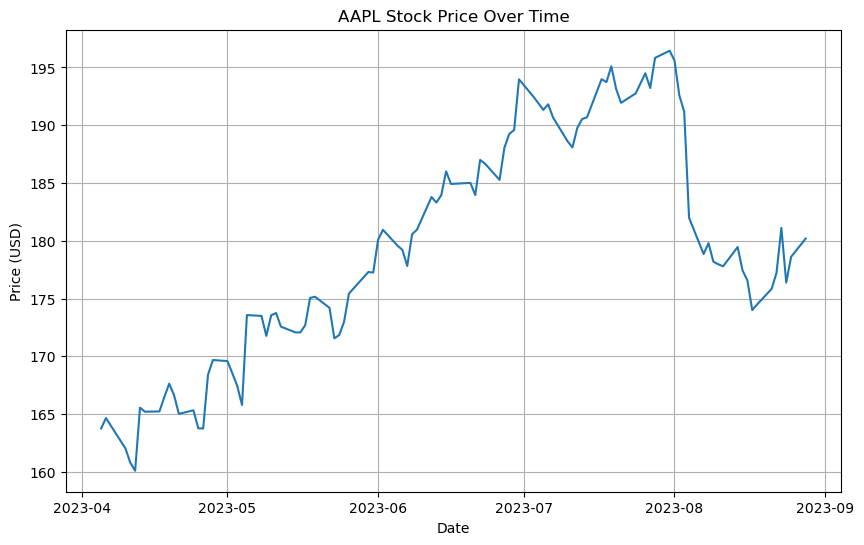

In [3]:
symbol = 'AAPL'
data = fetch_data(symbol, 'TIME_SERIES_DAILY')
df = pd.DataFrame(data['Time Series (Daily)']).T
df.index = pd.to_datetime(df.index)
df['4. close'] = df['4. close'].astype(float)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['4. close'])
plt.title(f'{symbol} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

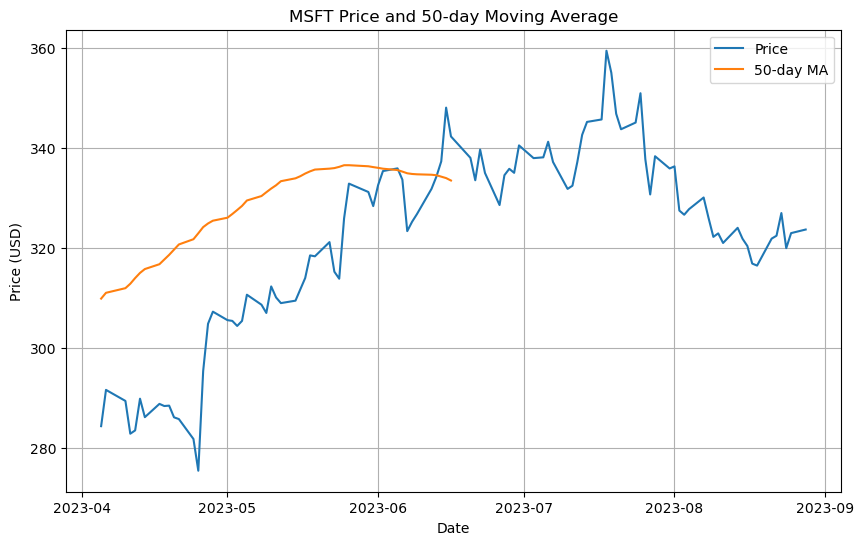

In [4]:
symbol = 'MSFT'
data = fetch_data(symbol, 'TIME_SERIES_DAILY')
df = pd.DataFrame(data['Time Series (Daily)']).T
df.index = pd.to_datetime(df.index)
df['4. close'] = df['4. close'].astype(float)
df['50-day MA'] = df['4. close'].rolling(window=50).mean()
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['4. close'], label='Price')
plt.plot(df.index, df['50-day MA'], label='50-day MA')
plt.title(f'{symbol} Price and 50-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

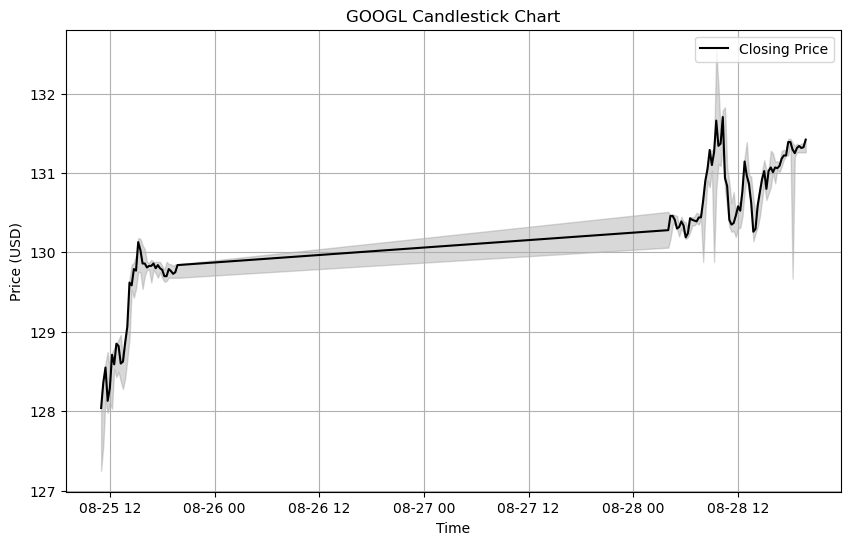

In [5]:
symbol = 'GOOGL'
data = fetch_data(symbol, 'TIME_SERIES_INTRADAY', interval='15min')
df = pd.DataFrame(data['Time Series (15min)']).T
df.index = pd.to_datetime(df.index)
df[['1. open', '2. high', '3. low', '4. close']] = df[['1. open', '2. high', '3. low', '4. close']].astype(float)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['4. close'], label='Closing Price', color='black')
plt.fill_between(df.index, df['3. low'], df['2. high'], color='gray', alpha=0.3)
plt.title(f'{symbol} Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

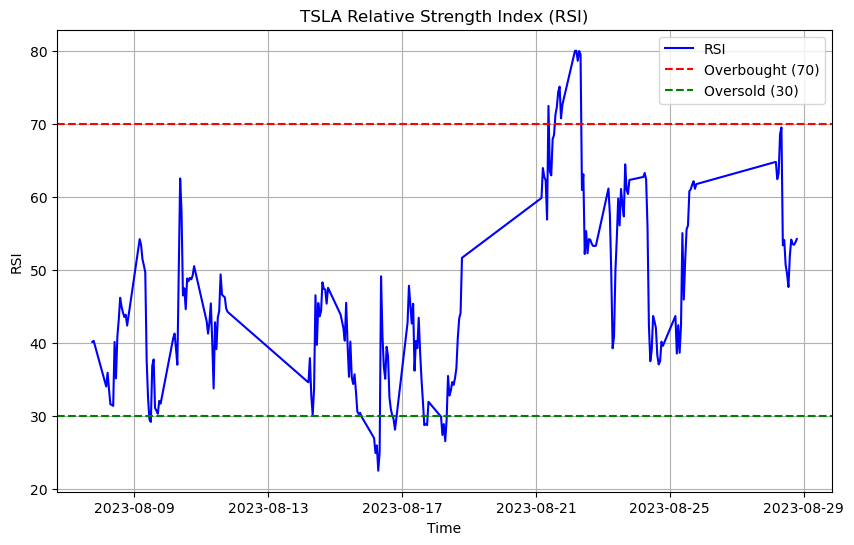

In [6]:
symbol = 'TSLA'
data = fetch_data(symbol, 'RSI', interval='60min', time_period=14, series_type='close')
df = pd.DataFrame(data['Technical Analysis: RSI']).T
df.index = pd.to_datetime(df.index)
df['RSI'] = df['RSI'].astype(float)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['RSI'], label='RSI', color='blue')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title(f'{symbol} Relative Strength Index (RSI)')
plt.xlabel('Time')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

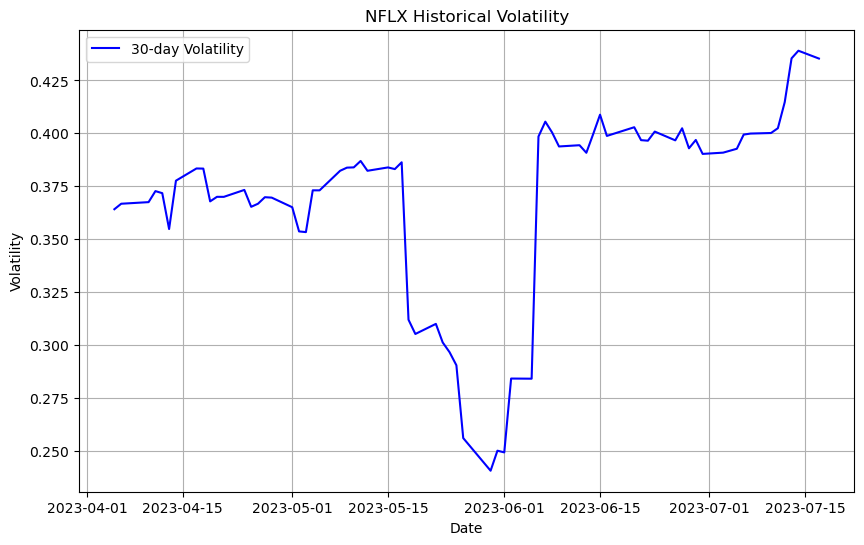

In [7]:
symbol = 'NFLX'
data = fetch_data(symbol, 'TIME_SERIES_DAILY')
df = pd.DataFrame(data['Time Series (Daily)']).T
df.index = pd.to_datetime(df.index)
df['4. close'] = df['4. close'].astype(float)
df['daily_return'] = df['4. close'].pct_change()
df['daily_volatility'] = df['daily_return'].rolling(window=30).std() * (252 ** 0.5)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['daily_volatility'], label='30-day Volatility', color='blue')
plt.title(f'{symbol} Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

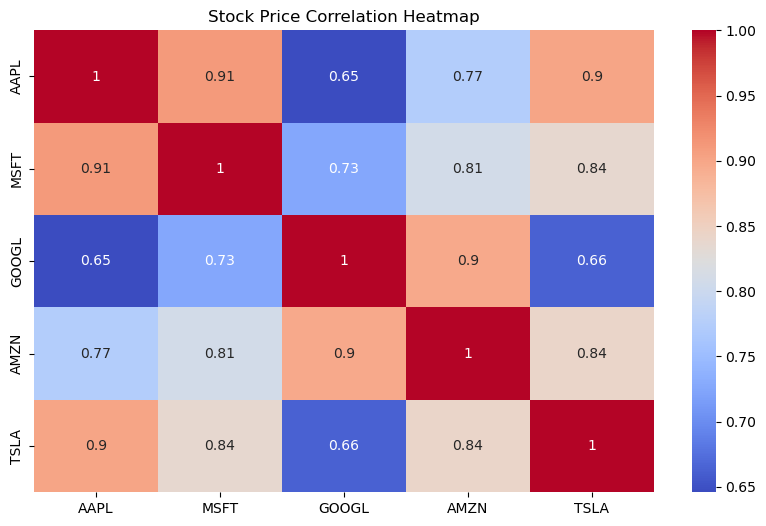

In [15]:
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data_dict = {}
for symbol in symbols:
    data = fetch_data(symbol, 'TIME_SERIES_DAILY')
    df = pd.DataFrame(data['Time Series (Daily)']).T
    df.index = pd.to_datetime(df.index)
    df['4. close'] = df['4. close'].astype(float)
    data_dict[symbol] = df['4. close']
correlation_df = pd.DataFrame(data_dict)
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Stock Price Correlation Heatmap')
plt.show()

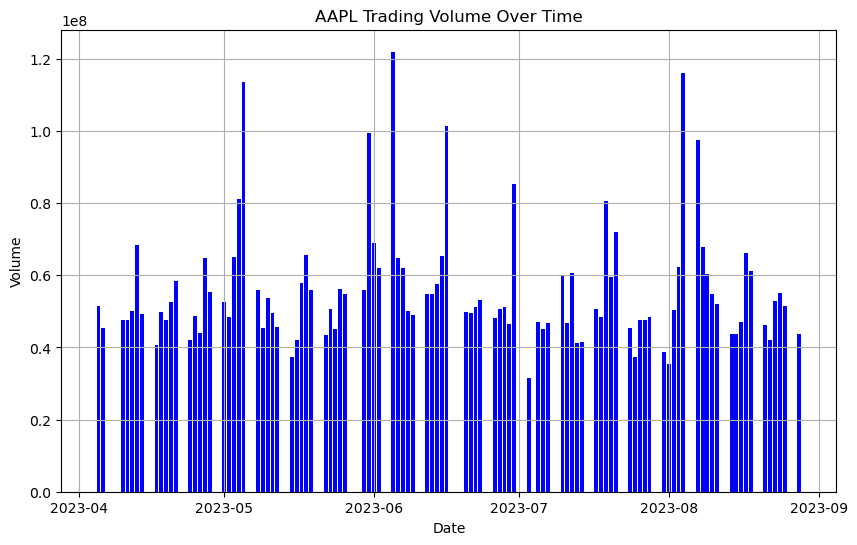

In [9]:
symbol = 'AAPL'
data = fetch_data(symbol, 'TIME_SERIES_DAILY')
df = pd.DataFrame(data['Time Series (Daily)']).T
df.index = pd.to_datetime(df.index)
df['5. volume'] = df['5. volume'].astype(int)
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['5. volume'], color='blue')
plt.title(f'{symbol} Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

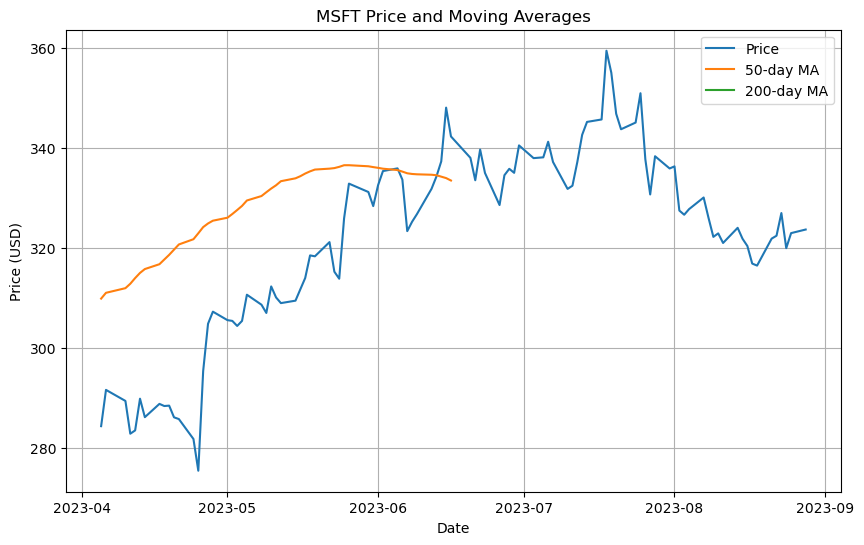

In [10]:
symbol = 'MSFT'
data = fetch_data(symbol, 'TIME_SERIES_DAILY')
df = pd.DataFrame(data['Time Series (Daily)']).T
df.index = pd.to_datetime(df.index)
df['4. close'] = df['4. close'].astype(float)
df['50-day MA'] = df['4. close'].rolling(window=50).mean()
df['200-day MA'] = df['4. close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['4. close'], label='Price')
plt.plot(df.index, df['50-day MA'], label='50-day MA')
plt.plot(df.index, df['200-day MA'], label='200-day MA')
plt.title(f'{symbol} Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
plt.figure(figsize=(12, 6))
for symbol in symbols:
    data = fetch_data(symbol, 'TIME_SERIES_DAILY')
    df = pd.DataFrame(data['Time Series (Daily)']).T
    df.index = pd.to_datetime(df.index)
    df['4. close'] = df['4. close'].astype(float)
    plt.plot(df.index, df['4. close'], label=symbol)
plt.title('Sector-wise Stock Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()